Exploring Fandango Movie Ratings through Sampling and Analysis of Distributions

This project is aimed at analyzing the difference between the published star rating of movies against the star rating displayed to visitors on the Fandango site. Data journalist Walt Hickey was the first to analyze the difference and found that Fandango's system was rounding up star ratings to the nearest half star. Thus, a 4.1 movie would be rounded up to 4.5. This skews the distribution of star ratings and has been ascribed to a bug in Fandango's code.


In [3]:
import pandas as pd
fandango = pd.read_csv('fandango_score_comparison.csv')
movie = pd.read_csv('movie_ratings_16_17.csv')

fandango.describe()

RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  \
count      146.000000           146.000000  146.000000       146.000000   
mean        60.849315            63.876712   58.808219         6.519178   
std         30.168799            20.024430   19.517389         1.510712   
min          5.000000            20.000000   13.000000         2.400000   
25%         31.250000            50.000000   43.500000         5.700000   
50%         63.500000            66.500000   59.000000         6.850000   
75%         89.000000            81.000000   75.000000         7.500000   
max        100.000000            94.000000   94.000000         9.600000   

             IMDB  Fandango_Stars  Fandango_Ratingvalue     RT_norm  \
count  146.000000      146.000000            146.000000  146.000000   
mean     6.736986        4.089041              3.845205    3.042466   
std      0.958736        0.540386              0.502831    1.508440   
min      4.000000        3.000000              2.700000    0.250000   
25%      6.300000        3.500000              3.500000    1.562500   
50%      6.900000        4.000000              3.900000    3.175000   
75%      7.400000        4.500000              4.200000    4.450000   
max      8.600000        5.000000              4.800000    5.000000   

       RT_user_norm  Metacritic_norm         ...            IMDB_norm  \
count    146.000000       146.000000         ...           146.000000   
mean       3.193836         2.940411         ...             3.368493   
std        1.001222         0.975869         ...             0.479368   
min        1.000000         0.650000         ...             2.000000   
25%        2.500000         2.175000         ...             3.150000   
50%        3.325000         2.950000         ...             3.450000   
75%        4.050000         3.750000         ...             3.700000   
max        4.700000         4.700000         ...             4.300000   

       RT_norm_round  RT_user_norm_round  Metacritic_norm_round  \
count     146.000000          146.000000             146.000000   
mean        3.065068            3.226027               2.972603   
std         1.514600            1.007014               0.990961   
min         0.500000            1.000000               0.500000   
25%         1.500000            2.500000               2.125000   
50%         3.000000            3.500000               3.000000   
75%         4.500000            4.000000               4.000000   
max         5.000000            4.500000               4.500000   

       Metacritic_user_norm_round  IMDB_norm_round  \
count                  146.000000       146.000000   
mean                     3.270548         3.380137   
std                      0.788116         0.502767   
min                      1.000000         2.000000   
25%                      3.000000         3.000000   
50%                      3.500000         3.500000   
75%                      4.000000         3.500000   
max                      5.000000         4.500000   

       Metacritic_user_vote_count  IMDB_user_vote_count  Fandango_votes  \
count                  146.000000            146.000000      146.000000   
mean                   185.705479          42846.205479     3848.787671   
std                    316.606515          67406.509171     6357.778617   
min                      4.000000            243.000000       35.000000   
25%                     33.250000           5627.000000      222.250000   
50%                     72.500000          19103.000000     1446.000000   
75%                    168.500000          45185.750000     4439.500000   
max                   2375.000000         334164.000000    34846.000000   

       Fandango_Difference  
count           146.000000  
mean              0.243836  
std               0.152665  
min               0.000000  
25%               0.100000  
50%               0.200000  
75%               0.400000  
max               0.500000  

[8 r

In [4]:
movie.describe()

year   metascore        imdb      tmeter    audience  \
count   214.000000  214.000000  214.000000  214.000000  214.000000   
mean   2016.107477   53.266355    6.440654   53.621495   58.626168   
std       0.310444   17.843585    1.030056   30.242396   21.100040   
min    2016.000000   11.000000    3.500000    0.000000   11.000000   
25%    2016.000000   39.000000    5.825000   27.000000   43.250000   
50%    2016.000000   53.500000    6.500000   56.500000   60.500000   
75%    2016.000000   66.000000    7.200000   83.000000   76.750000   
max    2017.000000   99.000000    8.500000   99.000000   93.000000   

         fandango  n_metascore      n_imdb    n_tmeter  n_audience  \
count  214.000000   214.000000  214.000000  214.000000  214.000000   
mean     3.894860     2.663318    3.220327    2.681075    2.931308   
std      0.516781     0.892179    0.515028    1.512120    1.055002   
min      2.500000     0.550000    1.750000    0.000000    0.550000   
25%      3.500000     1.950000    2.912500    1.350000    2.162500   
50%      4.000000     2.675000    3.250000    2.825000    3.025000   
75%      4.500000     3.300000    3.600000    4.150000    3.837500   
max      5.000000     4.950000    4.250000    4.950000    4.650000   

       nr_metascore     nr_imdb   nr_tmeter  nr_audience  
count    214.000000  214.000000  214.000000   214.000000  
mean       2.658879    3.214953    2.691589     2.915888  
std        0.924619    0.526803    1.519273     1.060352  
min        0.500000    2.000000    0.000000     0.500000  
25%        2.000000    3.000000    1.500000     2.000000  
50%        2.500000    3.000000    3.000000     3.000000  
75%        3.500000    3.500000    4.000000     4.000000  
max        5.000000    4.000000    5.000000     4.500000

In [5]:
fandango_sliced = fandango[['FILM','Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
movie_sliced = movie[['movie', 'year', 'fandango']]

### Is the Data Representative
From the Readme.md files, it appears that the 'movie_ratings_16_17.csv' file is not a representative sample as it draws from the 214 most popular movies during that time period. Furthermore, the original fandango data was pulled with the following requirements: "contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango"

This similarly skews the data towards popular movies, however it is difficult to compare movies without sufficient ratings and unpopular movies will naturally accumulate fewer reviews. We will proceed with this sampling method in mind: seeking to explore if Fandango has indeed adjusted their rating system for the most popular movies on their platform. But, what criteria defines a "popular" film?


### Defining Popularity

We need to develop precise criteria to ensure that our comparison of popular films is consistent across the time boundary. For now, we will use Hickey's original criteria: whether each film received at least 30 reviews.

In [6]:
fandango_sliced.sample(10, random_state = 1)

FILM  Fandango_Stars  \
98                                    Get Hard (2015)             4.0   
66                                    The Gift (2015)             4.0   
53                                 Hot Pursuit (2015)             4.0   
75                                 San Andreas (2015)             4.5   
121             The Stanford Prison Experiment (2015)             4.0   
74   The Hobbit: The Battle of the Five Armies (2014)             4.5   
119                                    Phoenix (2015)             3.5   
128       Mission: Impossible â€“ Rogue Nation (2015)             4.5   
44                Kingsman: The Secret Service (2015)             4.5   
58                                 Seventh Son (2015)             3.5   

     Fandango_Ratingvalue  Fandango_votes  Fandango_Difference  
98                    3.9            5933                  0.1  
66                    3.7            2680                  0.3  
53                    3.7            2618                  0.3  
75                    4.3            9749                  0.2  
121                   3.9              51                  0.1  
74                    4.3           15337                  0.2  
119                   3.4              70                  0.1  
128                   4.4            8357                  0.1  
44                    4.2           15205                  0.3  
58                    3.2            1213                  0.3

In [7]:
movie_sliced.sample(10,random_state = 1)

movie  year  fandango
108                   Mechanic: Resurrection  2016       4.0
206                                 Warcraft  2016       4.0
106                                Max Steel  2016       3.5
107                            Me Before You  2016       4.5
51   Fantastic Beasts and Where to Find Them  2016       4.5
33                                      Cell  2016       3.0
59                                    Genius  2016       3.5
152                                    Sully  2016       4.5
4                    A Hologram for the King  2016       3.0
31                Captain America: Civil War  2016       4.5

Exploring this manually, each of these films meets the criteria of >= 30 reviews, although it is now later than when the sample was drawn. However, we will proceed.

In [16]:
fandango['Year'] = fandango['FILM'].str[-5:-1]
fandango_2015 = fandango[fandango['Year'] == '2015'].copy()
fandango_2016 = movie[movie['year'] == 2016].copy()

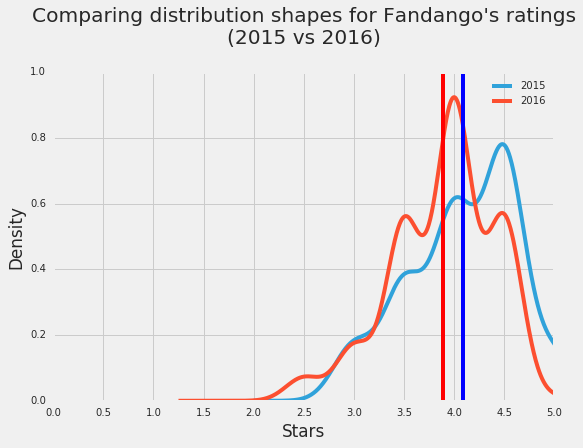

In [20]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.axvline(x = fandango_2015['Fandango_Stars'].mean(), color = 'blue')
plt.axvline(x = fandango_2016['fandango'].mean(), color = 'red')
plt.show()

### Comparing the Distributions
It looks like the 2016 movies are indeed rated lower than the 2015 movies. There is significant space between the height of each curve, and a delta in the means.


In [21]:
print(2015)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [22]:
print(2016)
fandango_2016['fandango'].value_counts(normalize = True).sort_index()*100

2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Looking at relative frequencies, it is apparent that there is more grouping aroiund 4.0 stars than 2015, and less relative frequency of 5 star reviews. Furthermore, 2016 shows higher prevalence on the lower end of the scale and some 2.5 star reviews. 


In [23]:
fandango_2015_mean = fandango_2015['Fandango_Stars'].mean()
fandango_2015_median = fandango_2015['Fandango_Stars'].median()
fandango_2015_mode = fandango_2015['Fandango_Stars'].mode()

fandango_2016_mean = fandango_2016['fandango'].mean()
fandango_2016_median = fandango_2016['fandango'].median()
fandango_2016_mode = fandango_2016['fandango'].mode()

In [27]:
summary = pd.DataFrame()
summary['2015'] = [fandango_2015_mean, fandango_2015_median, fandango_2015_mode]
summary['2016'] = [fandango_2016_mean, fandango_2016_median, fandango_2016_mode]
summary.index = ['mean', 'median', 'mode']
summary


2015                     2016
mean                    4.08527                  3.88743
median                        4                        4
mode    0    4.5
dtype: float64  0    4.0
dtype: float64

TypeError: 'Series' objects are mutable, thus they cannot be hashed